In [93]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# General Plotting Parameters
mpl.rcParams['figure.figsize'] = (8,5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 14.
mpl.rcParams['legend.fontsize'] = 12.
mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 10.
mpl.rcParams['ytick.labelsize'] = 10.
mpl.rcParams['xtick.minor.pad'] = 4
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

#Git says this is patched, but it doesn't work from Pip --upgrade 26-mar-2015
#mpl.rcParams['xtick.minor.visible'] = True  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  


Populating the interactive namespace from numpy and matplotlib


In [94]:
import calc_enrich
reload(calc_enrich)

# Standard 2 (P2-Type) parameters (Glaser 2009)
d = 0.15  # m 
Z = 1.0   # m
F_m_hrs = 15*60*60/(1e3) # grams/hr  
T = 320.0# K
cut = 0.5
v_a = 485
#omega = 485/(d/2)
#v_a = omega * (d/2.0)

# Estimates for IR-1 cascade 
Fc_month = 739 #kg/month
Pc_month = 77 #kg/month
Nfc = 0.0071
Npc = 0.035
Nwc = 0.001

F_m = F_m_hrs/(60*60*1000.0)
Fc = Fc_month/(30.4*24*60*60)
Pc = Pc_month/(30.4*24*60*60)



3.1939942860967817e-07

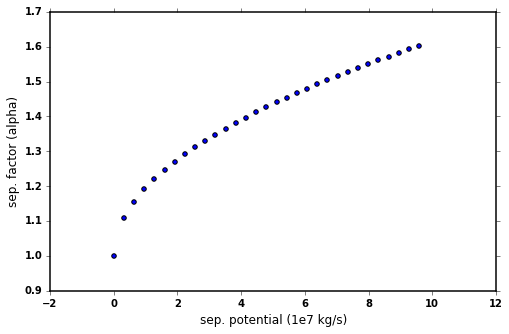

In [101]:
from calc_enrich import calc_del_U
from calc_enrich import alpha_by_swu

S2_alpha, S2_del_U, del_U_yr = calc_del_U(v_a, Z, d, F_m, T, cut)

dels = []
alphas = []

for i in range(100):
    del_U = S2_del_U*(3-(0.1*i))
    dels.append(del_U)
    alphas.append(alpha_by_swu(del_U, F_m, cut))
    
scaled_dels = [x*1e7 for x in dels]
    
plt.scatter(scaled_dels, alphas)
plt.xlabel('sep. potential (1e7 kg/s)')
plt.ylabel('sep. factor (alpha)')


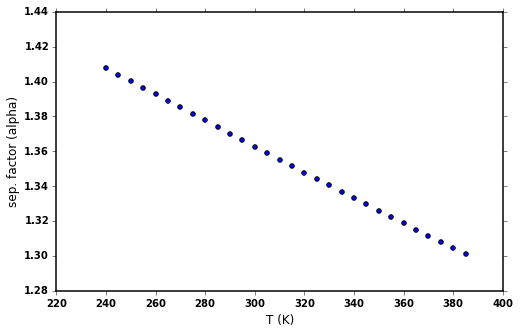

In [96]:
Ts = []
alpha_Ts = []

for i in range(30):
    T_i = 240+ (5*i)
    alpha_i, del_U_i, del_U_yr = calc_del_U(v_a, Z, d, F_m, T_i, cut, eff=1.0)
    Ts.append(T_i)
    alpha_Ts.append(alpha_i)
    
plt.scatter(Ts,alpha_Ts)
plt.xlabel('T (K)')
plt.ylabel('sep. factor (alpha)')

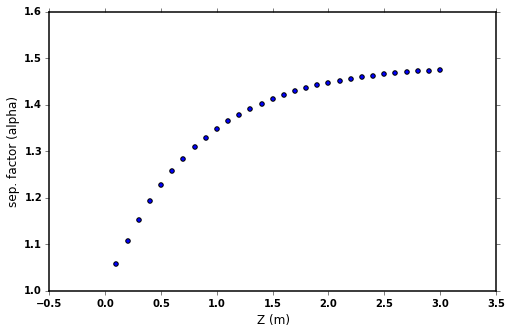

In [97]:
Zs = []
alpha_Zs = []

for i in range(30):
    Z_i = 0.1 + (0.1*i)
    alpha_i, del_U_i, del_U_yr = calc_del_U(v_a, Z_i, d, F_m, T, cut, eff=1.0)
    Zs.append(Z_i)
    alpha_Zs.append(alpha_i)
    
plt.scatter(Zs,alpha_Zs)
plt.xlabel('Z (m)')
plt.ylabel('sep. factor (alpha)')

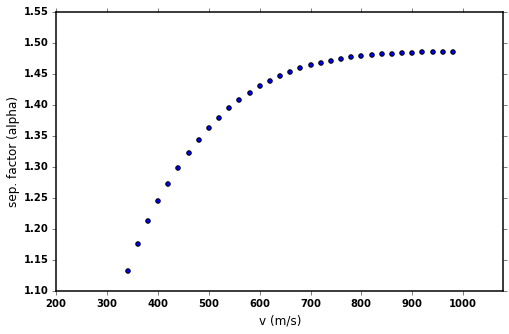

In [98]:
vs = []
alpha_vs = []

v_min = 200
for i in range(40):
    v_i = v_min + (20*i)
    alpha_i, del_U_i, del_U_yr = calc_del_U(v_i, Z, d, F_m, T, cut, eff=1.0)
    vs.append(v_i)
    alpha_vs.append(alpha_i)
    
plt.scatter(vs,alpha_vs)
plt.xlabel('v (m/s)')
plt.xlim([v_min, max(vs)*1.1])
plt.ylabel('sep. factor (alpha)')

3.1939942860967817e-07

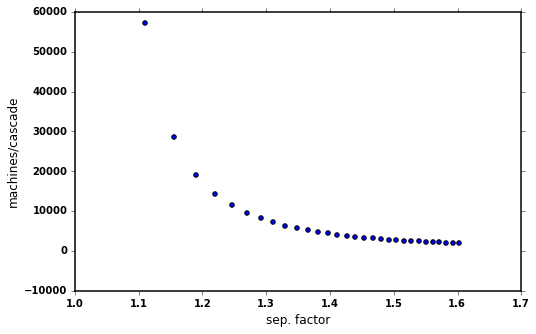

In [112]:
from calc_enrich import machines_per_cascade

dels = []
alpha_ms = []
n_mach = []

for i in range(30):
    del_U_i = S2_del_U*(3-(0.1*i))
    alpha_i = alpha_by_swu(del_U_i, F_m, cut)
    n_cf = machines_per_cascade(del_U_i, Npc, Nwc, Fc, Pc)

    dels.append(del_U_i)
    alpha_ms.append(alpha_i)
    n_mach.append(n_cf)

scaled_dels = [x*1e7 for x in dels]

plt.scatter(alpha_ms, n_mach)
plt.xlabel('sep. factor')
plt.ylabel('machines/cascade')

S2_del_U